<a href="https://colab.research.google.com/github/monishsai4/TensorFlow-for-NN/blob/main/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


T-shirt/top


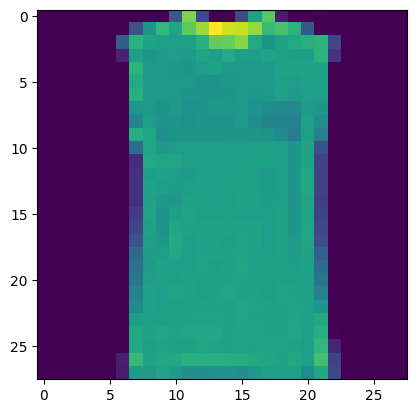

In [4]:
num1 = np.random.randint(xtrain.shape[0])
plt.imshow(xtrain[num1])
print(class_names[ytrain[num1]])

In [17]:
xtrain = tf.keras.utils.normalize(xtrain,axis = 1)
xtest = tf.keras.utils.normalize(xtest,axis = 1)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides = 2),
    tf.keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
  ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [30]:
model.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4290 - accuracy: 0.8423
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2834 - accuracy: 0.8955
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2420 - accuracy: 0.9104
Epoch 4/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.2114 - accuracy: 0.9209
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1839 - accuracy: 0.9307
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1637 - accuracy: 0.9380
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1412 - accuracy: 0.9472
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1218 - accuracy: 0.9546
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1059 - accuracy: 0.9604
Epoch 10/10
1875/1875 [==============================] - 56s 30m

In [34]:
testloss,testaccuracy=model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 9ms/step - loss: 0.3009 - accuracy: 0.9113


In [36]:
predict = model.predict(xtest)

313/313 [==============================] - 3s 8ms/step


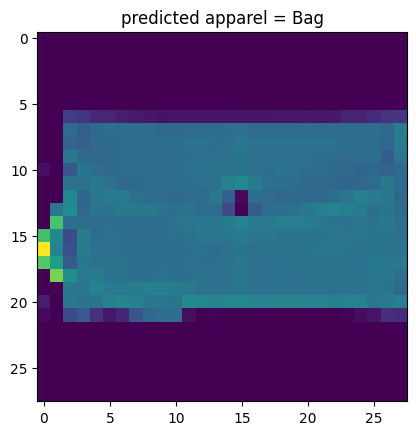

In [73]:
num1 = np.random.randint(predict.shape[0])
prediction = np.argmax(predict[num1])
plt.title("predicted apparel = "+str(class_names[prediction]))

plt.imshow(xtest[num1])

In [71]:
print(predict[num1])
print(num1)
print(prediction)

[6.6028810e-01 1.4985227e-08 1.8097940e-04 8.3060550e-05 5.1481843e-06
 1.0460803e-07 3.3944058e-01 3.4465236e-07 1.6416654e-06 4.2192809e-08]
8128
0
